
# Understanding The Dataset:



 Now from dataset description we have 2 datasets:
 
1. The Original Dataset 
2. The Generated Dataset (train.csv, test.csv, sample.csv)

    
  ## Original Dataset Description:
    

This dataset consists of **79 urine specimens** that were analyzed to determine if certain physical characteristics of the urine are related to the formation of calcium oxalate crystals, which are the most common type of kidney stones. The six physical characteristics of the urine that were analyzed are:

1. Specific gravity: The density of the urine relative to water.
2. pH: The negative logarithm of the hydrogen ion.
3. Osmolarity (mOsm): A unit used in biology and medicine but not in physical chemistry. Osmolarity is proportional to the concentration of molecules in solution.
4. Conductivity (mMho milliMho): One Mho is one reciprocal Ohm. Conductivity is proportional to the concentration of charged ions in solution.
5. Urea concentration in millimoles per litre.
6. Calcium concentration (CALC) in millimoles per litre.

The objective of this dataset is to **predict the presence of kidney stones** based on the u**rine analysis results**.


    
# EDA


In [1]:
#importing libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")

In [2]:
original_df = pd.read_csv("/kaggle/input/kidney-stone-prediction-based-on-urine-analysis/kindey stone urine analysis.csv")
train_df = pd.read_csv("/kaggle/input/playground-series-s3e12/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s3e12/test.csv")

In [3]:
original_df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [4]:
train_df

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [5]:
test_df

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36
...,...,...,...,...,...,...,...
271,685,1.029,6.27,853,21.4,364,7.31
272,686,1.012,5.62,410,14.0,195,1.45
273,687,1.031,5.68,874,29.0,380,4.49
274,688,1.019,5.47,543,21.4,170,1.64


In [6]:

print("The shape of Original Dataset:", original_df.shape)

print("The shape of Train Dataset:", train_df.shape)

print("The shape of Test Dataset:", test_df.shape)


The shape of Original Dataset: (79, 7)
The shape of Train Dataset: (414, 8)
The shape of Test Dataset: (276, 7)


note that the shape of **Train Dataset** includes 8 columns because it includes id column

let's see datatypes for each column:

In [7]:
print("The Original Dataset Info: ")
print()
print(original_df.info())
print("-" * 50) 
print()

print("The Train Dataset Info: ")
print()
print(train_df.info())
print("-" * 50) 
print()

print("The Test Dataset Info: ")
print()
print(test_df.info())
print("-" * 50) 

The Original Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB
None
--------------------------------------------------

The Train Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-nu

Great! from original, train, test datasets we see there's no null values and datatypes float64 and int64

We can aslo check the null using other method such:

> train.isnull().sum()  #copy and run in a cell

Let's now check duplicates

In [8]:
print("Duplicates for Original DataFrames:")
print(original_df[original_df.duplicated()])
print()
print("-"*60)
print("Duplicates for Train DataFrames:")
print(train_df[train_df.duplicated()])
print()
print("-"*60)
print("Duplicates for Test DataFrames")
print(test_df[test_df.duplicated()])


Duplicates for Original DataFrames:
Empty DataFrame
Columns: [gravity, ph, osmo, cond, urea, calc, target]
Index: []

------------------------------------------------------------
Duplicates for Train DataFrames:
Empty DataFrame
Columns: [id, gravity, ph, osmo, cond, urea, calc, target]
Index: []

------------------------------------------------------------
Duplicates for Test DataFrames
Empty DataFrame
Columns: [id, gravity, ph, osmo, cond, urea, calc]
Index: []


let's see descriptive data using .describe() 

In [9]:
original_df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [10]:
train_df.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [11]:
train_df.nunique()

id         414
gravity     28
ph          71
osmo        80
cond        65
urea        73
calc        85
target       2
dtype: int64


## Visualizations 

now time to visualization but before this, dropping id column
    

In [12]:
train_df_2 = train_df.drop('id', axis = 1)

### Distributions OF Features

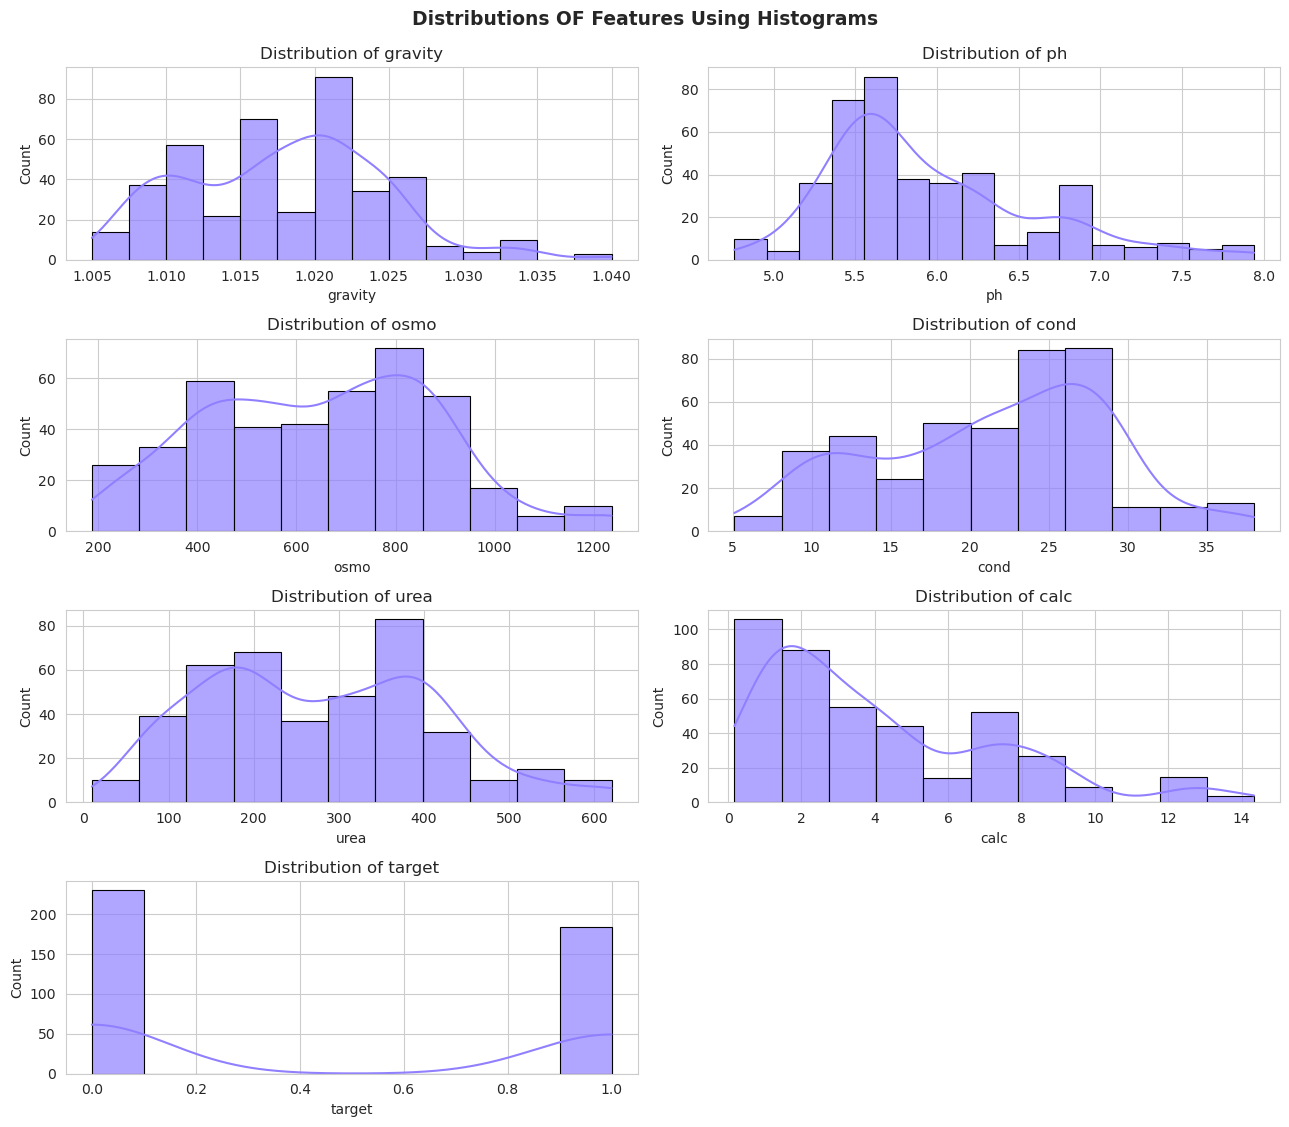

In [13]:
fig = plt.figure(figsize = (13,11))
for i, col in enumerate(train_df_2.columns, 1):
    plt.subplot(4,2,i)
    sns.histplot(x = train_df_2[col], kde = True , color = "#9080ff", linewidth = 0.8, edgecolor = 'k', alpha = 0.7)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()

fig.suptitle('Distributions OF Features Using Histograms', fontsize=13.5, fontweight='heavy', y=1.02)

plt.show()

From Histograms: 
1. Gravity has a slightly positive skewness, meaning that the distribution is slightly skewed to the right.
2. Ph has a positive skewness, meaning that the distribution is skewed to the right, and the tail on the right side is longer or fatter than the left side.
3. Osmo has a slightly positive skewness, meaning that the distribution is slightly skewed to the right.
4. Cond has a negative skewness, meaning that the distribution is skewed to the left, and the tail on the left side is longer or fatter than the right side.
5. Urea has a slightly positive skewness, meaning that the distribution is slightly skewed to the right.
6. Calc has a positive skewness, meaning that the distribution is skewed to the right, and the tail on the right side is longer or fatter than the left side.
7. Target has a slightly positive skewness, meaning that the distribution is slightly skewed to the right.

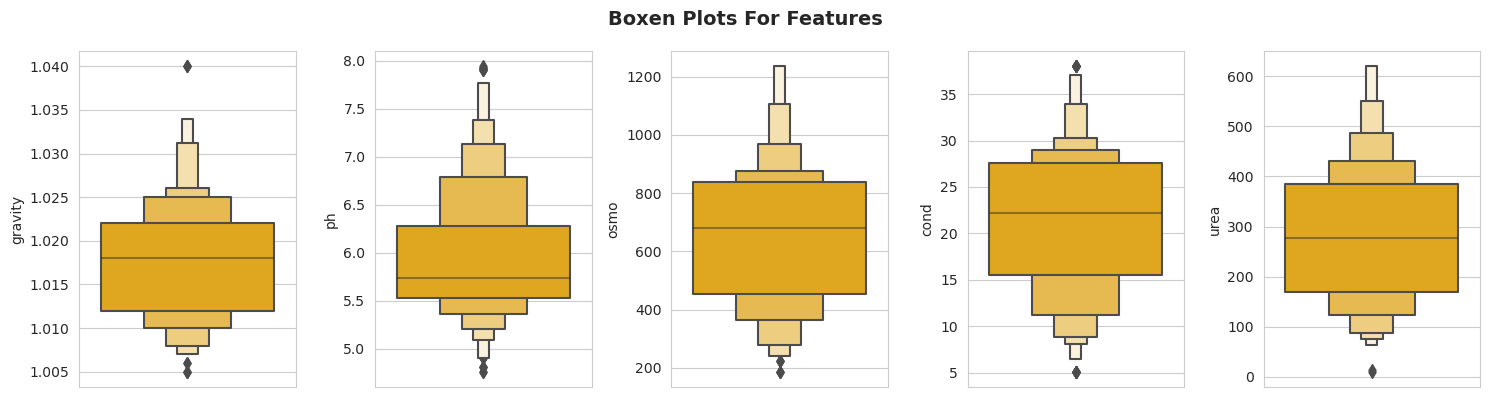

In [14]:
_, axes = plt.subplots(1, 5, figsize = (15,4))

for i, ax in enumerate(axes.flatten()):
    sns.boxenplot(y = train_df_2[train_df_2.columns[i]], color = "#ffb400", ax = axes[i] )


_.suptitle('Boxen Plots For Features', fontsize = 14, fontweight = 'heavy')
plt.tight_layout()
plt.show()

### Target vs Features

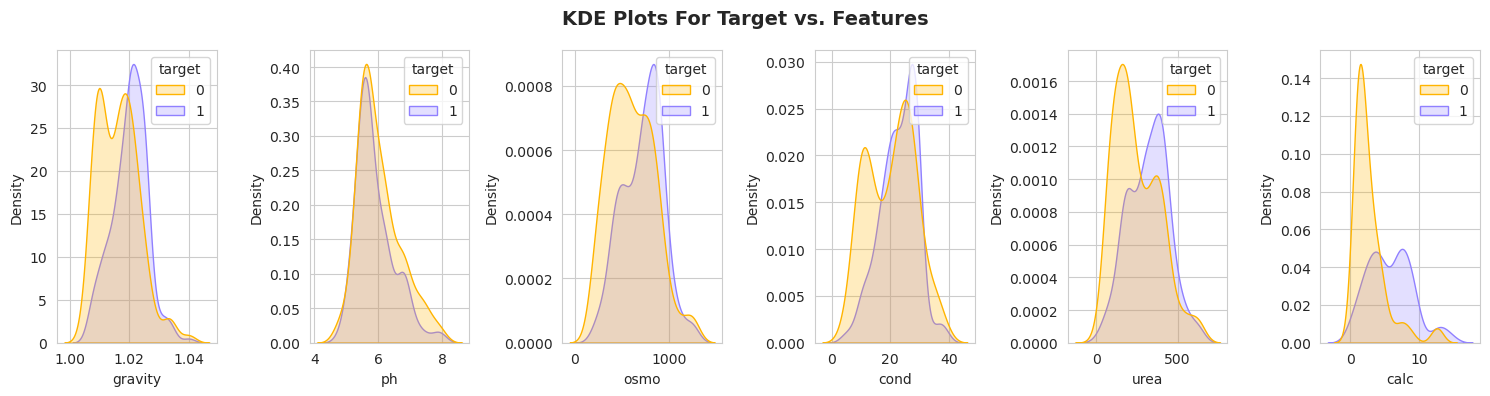

In [15]:
fig, axes = plt.subplots(1,6, figsize = (15,4))
for i, ax in enumerate(axes.flatten()):
    sns.kdeplot(data = train_df_2 ,x=  train_df_2.columns[i], hue = 'target', fill = True, ax = ax, palette = ['#ffb400', '#9080ff'])
fig.suptitle("KDE Plots For Target vs. Features", fontsize = 14, fontweight = 'heavy')
plt.tight_layout()

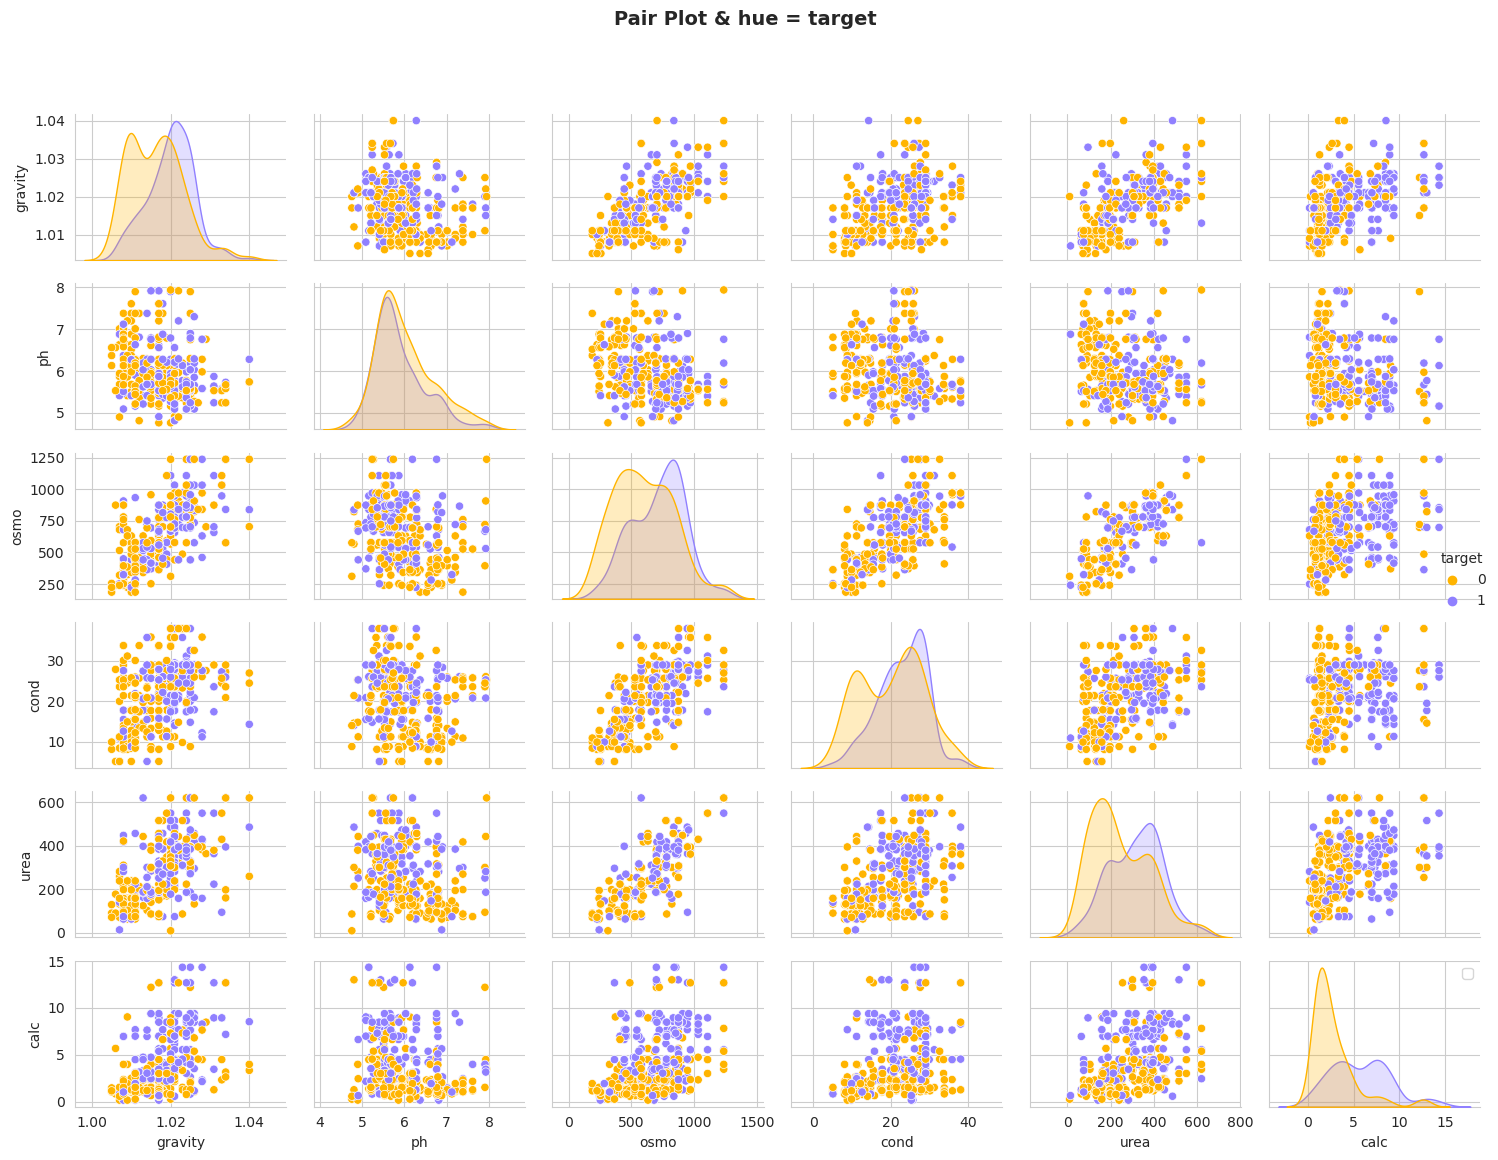

In [16]:
f = sns.pairplot(train_df_2, hue='target', diag_kind="kde", palette=['#ffb400', '#9080ff'], height=4, aspect=1.2)
f.fig.set_size_inches(15, 11)
f.fig.suptitle('Pair Plot & hue = target', fontsize=14, fontweight='heavy', y=1.05)
plt.legend()
plt.tight_layout()
plt.show()


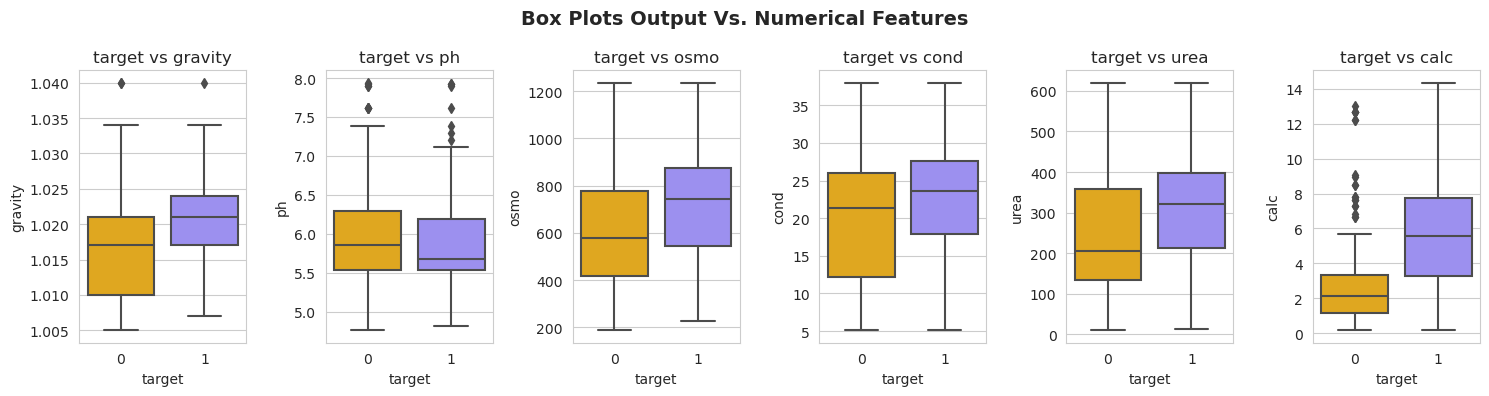

In [17]:
f, ax = plt.subplots(1, 6, figsize=(15, 4))

for i in range( len(train_df_2.columns) - 1 ):
    sns.boxplot(x='target', y=train_df_2.columns[i], data=train_df_2, ax=ax[i], palette=['#ffb400', '#9080ff'])
    ax[i].title.set_text('target vs {0}'.format(train_df_2.columns[i]))
f.suptitle('Box Plots Output Vs. Numerical Features', fontsize=14, fontweight='heavy')
plt.tight_layout()


### Person Correlation Heatmap

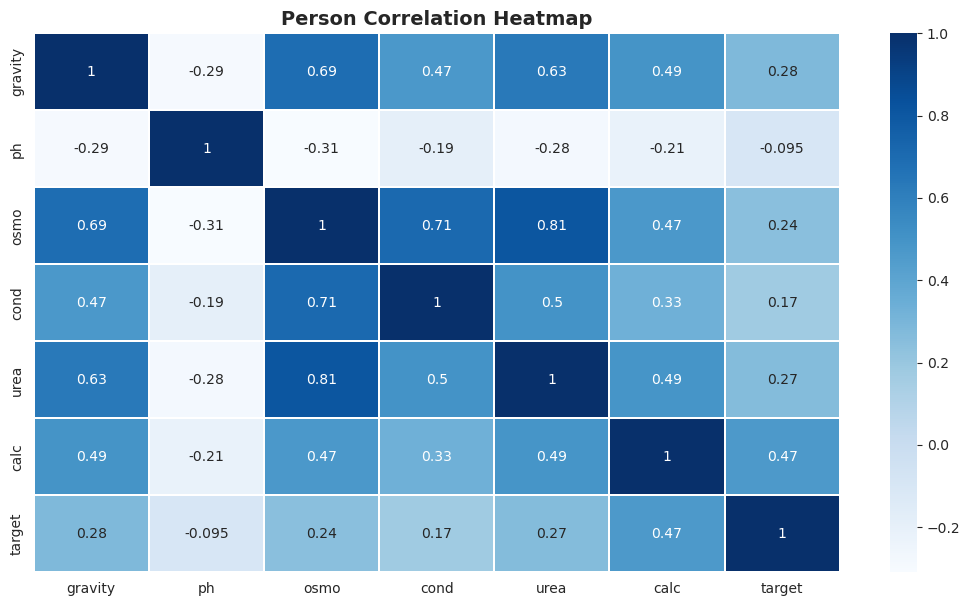

In [18]:
plt.figure(figsize = (13,7))
sns.heatmap(train_df_2.corr(), annot = True, cmap = 'Blues', linewidth = 0.1)
plt.title("Person Correlation Heatmap", fontsize=14, fontweight='heavy')
plt.show()


# Modeling Using Pycaret
    


In [19]:
test_df_2 = test_df.drop('id', axis = 1)

In [20]:
train_df_3 = pd.concat([original_df, train_df_2])

In [21]:
train_df_3.shape

(493, 7)

In [22]:
from pycaret.classification import *
s = setup(train_df_3, target = "target", session_id = 123)

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
best = compare_models()

In [ ]:
plot_model(best, plot = 'confusion_matrix')

In [ ]:
plot_model(best, plot = 'auc')

In [ ]:
evaluate_model(best)

In [ ]:
tuned_best = tune_model(best)

In [ ]:
predictions = predict_model(tuned_best , data = test_df_2)

In [ ]:
test_df

In [ ]:
predictions

In [ ]:
save_model(tuned_best, 'my_pipeline')


# Submission
    


In [ ]:
my_sub = pd.DataFrame({
    'id': test_df['id'],
    'target':predictions['prediction_label']
    
})

In [ ]:
my_sub

In [ ]:
my_sub.to_csv("submission.csv")

Thanks for reading! :)